# Проект- компьютерные игры

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования:

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина.



### Ход исследования

Исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы я получу из файла '/datasets/games.csv'. О качестве данных ничего неизвестно, поэтому перед тем как приступить к целям исследования понадобится обзор данных. 
Я проверю данные на ошибки и оценю их влияние на исследование. Затем на этапе предобработки я поищу возможность исправить все ошибки данных которые не приведут к искажению кончного результата. Далее создадим необходимые столбцы и приступим к проведению исследовательского анализа. 

Ход исследования предполагает:
1.  <a href=#2>Обзор данных</a>
2.  <a href=#2>Предобработку данных</a>
3.  <a href=#3>Исследовательский анализ данных</a>
4.  <a href=#4>Составить портрета пользователя каждого региона</a>
5.  <a href=#5>Проверку гипотез</a>
6.  <a href=#6>Выводы</a>

## <a name="1"> 1. Обзор данных</a>

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import scipy
import warnings
warnings.filterwarnings('ignore')

Загрузим данные

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
display(games)
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Описание данных:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Вывод:

Наш набор данных включает 16715 строк и 11 столбцов, названия столбцов не соответствует требуемым стандартам. Достаточно много пропусков в столбцах оценок и рейтинга, с которыми нам нужно будет разобраться. Так же необходимо изменить тип данных в некоторых столбцах.

## <a name="2"> 2. Предобработка данных</a>

Переименуем столбцы, переведем названия в нижний регистр.

In [4]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Хвалю, что используешь str.lower, а не громоздкие неоптимальные конструкции

Обработаем пропуски в данных.

In [5]:
pd.DataFrame(round(games.isna().mean()*100, 3)).style.background_gradient('coolwarm')

,0
name,0.012000
platform,0.000000
year_of_release,1.609000
genre,0.012000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319000
user_score,40.090000


Пропуски в столбцах name и genre можно удалить, это всего две строки.

In [6]:
games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])

Пропуски в столбце year_of_release тоже удалим так как заполнить их нечем, объем менее 2% процентов, много не потеряем.

In [7]:
games = games.dropna(subset=['year_of_release'])

Переведем столбец year_of_release в цельночисленный формат.

In [8]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


Теперь данные пропущенны только в столбцах оценок и рейтинга, удалять строки с отсутствующими в них значениями не будем, так как потеряем большой объем данных. Возможно они не случайны, пропуски соотвествуют почти для всех строк с отсутствующими значениями.

Аббревиатура 'tbd' в столбце с оценкой пользователей звучит как "to be detirmined" или "будет определено". Заменим 'tbd' и пропуски  в столбцах critic_score, user_score, rating   "заглушками"  и переведем в соответствующий формат.

In [10]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [11]:
games['user_score']=pd.to_numeric(games['user_score'], errors='coerce')

In [12]:
games['user_score'] = games['user_score'].fillna(value='0').astype('float64', errors='ignore')
games['critic_score'] = games['critic_score'].fillna(value='0').astype('float64', errors='ignore')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN


In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Пропуски в столбце rating заменим на "Unknown"

In [14]:
games['rating'] = games['rating'].fillna('Unknown')

In [15]:
pd.DataFrame(round(games.isna().mean()*100, 3)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


Проверим данные на дубликаты и обработаем их.

In [16]:
games.duplicated().sum()

0

In [17]:
games['user_score'].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

In [18]:
games['critic_score'].unique()

array([76.,  0., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [19]:
games['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Дубликаты в нашем датасете отсутствуют.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38


Вывод:

В процессе предобработки данных мы отработали  пропуски и аномалии, проверили датасет на дубликаты, привели к соответствию тип данных и добавили столбец с необходимыми расчетами. Возможные причины отсутствия значений в столбцах critic_score, user_score и rating могут быть связаны с техническими ошибками, человеческим фактором или просто отсутствием данных. Например, игры могли не подвергаться оценке критиками или пользователями, что привело к пустым значениям в соответствующих столбцах.

## <a name="3"> 3. Исследовательский анализ данных</a>

Определим, сколько игр выпускалось в разные годы.

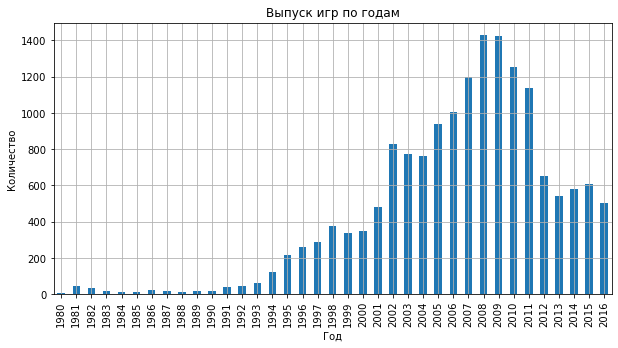

In [45]:
games.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize=(10,5), grid=True)
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество');

До 1995 года рост выпускаемых игр был очень незначительным, после 1995 года наблюдается рост до 2010 года, а затем спад в выпуске игр, это можно объяснить ростом популярности игр на мобильных устройствах.

Посмотрим как менялись продажи по платформам.

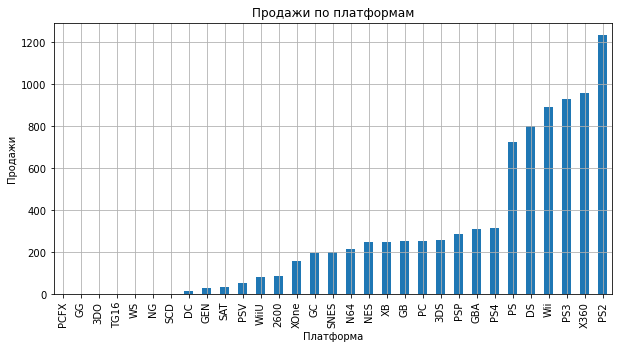

In [22]:
games.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar', figsize=(10,5), grid=True)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи');

Выберем топ-5 платформ по продажам и построим распределение по годам.

In [23]:
top_5_platforms = (games.groupby('platform', as_index=False)['total_sales']
 .sum()
 .sort_values('total_sales', ascending=False)
 .reset_index(drop=True)
 .head(5)
)
top_5_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


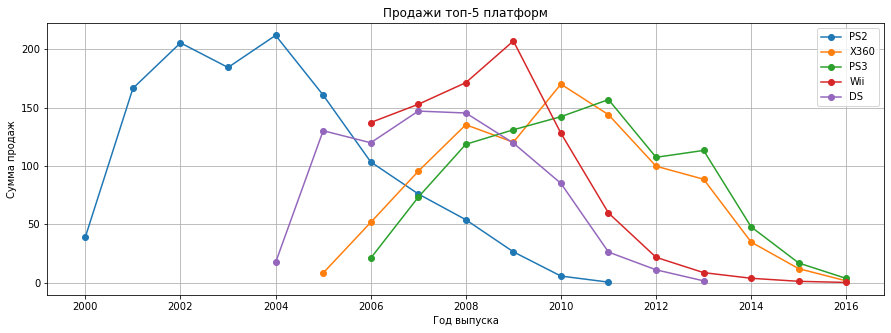

In [24]:
for i in list(top_5_platforms['platform']):
    (games[(games['platform'] == i) & (games['year_of_release'] >= 1995)]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(grid=True, style='o-', figsize=(15,5))
    )
    plt.legend(top_5_platforms['platform'])
    plt.title('Продажи топ-5 платформ')
    plt.ylabel('Сумма продаж')
    plt.xlabel('Год выпуска')

На графике хорошо видно как начинают расти продажи игр после выпуска новой платформы. Пик продаж для каждой платформы приходится примерно на 5-й год после релиза новой версии. Также, хорошо видно, что через 10 лет для каждой платформы продажи практически на нуле. Можно предположить, что "срок жизни" для платформ около 10 лет.

Определим актульный период для всех платформ, с учетом того, что это поможет нам построить прогноз на 2017 год. Наиболее характерным признаком для определения актуального периода является появление и быстрое развития рынка мобильных устройств. С 2011 года для всех платформ резко снизилось количество выпускаемых игр. Возьмем данные за 2014-2016 года, поскольку такую динамичную индустрию как игры, стоит рассматривать за не очень большой период.

Возьмем данные за актуальный период и посмотрим на продажи по платформам. Выясним какие платформы лидируют, какие растут и какие падают. На основе этих данных попробуем выбрать несколько потенциальных прибыльных платформ.

In [25]:
data_actual = games[games['year_of_release'] >= 2014]
data_actual.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,30.737715,3.482356,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,36.631206,3.503326,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,0.000000,3.400000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,71.000000,7.100000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


Построим график распределения по продажам за актуальный период.

year_of_release,2014,2015,2016,All
platform,,,,
PSP,0.24,0.12,0.00,0.36
Wii,3.75,1.14,0.18,5.07
PSV,11.90,6.25,4.25,22.40
PC,13.28,8.52,5.25,27.05
WiiU,22.03,16.35,4.60,42.98
X360,34.74,11.96,1.52,48.22
PS3,47.76,16.82,3.60,68.18
3DS,43.76,27.78,15.14,86.68
XOne,54.07,60.14,26.15,140.36


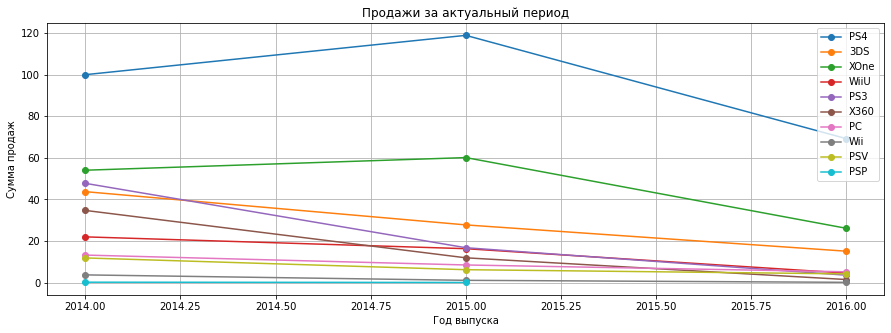

In [26]:
display(pd.pivot_table(
    data_actual, 
    index='platform', 
    values='total_sales', 
    columns='year_of_release', 
    aggfunc='sum', 
    fill_value=0, 
    margins=True
).sort_values('All')
       )

for i in list(data_actual['platform'].unique()):
    (data_actual[data_actual['platform'] == i]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(grid=True, style='o-', figsize=(15,5))
    )
    plt.legend(data_actual['platform'].unique())
    plt.title('Продажи за актуальный период')
    plt.ylabel('Сумма продаж')
    plt.xlabel('Год выпуска')

В наш список для актуального периода попали 10 платформ. Самыми быстрорастущими за этот период можно назвать PS4, 3DS и XOne. PS4 и вовсе продали более 100 млн копий за первые 2 календарных года существования платформы. 

Думаю, что стоить сосредоточиться на следующих платформах: PS4, 3DS, XOne и PC. Первые 3 платформы хоть и показывают спад, но продажи еще держаться на значительном уровне. Что же касается PC, то продажи здесь несколько ниже, чем у игровых консолей, но тенденция из года в год не такая стремительная. Плюсом к этому можно отметить, что достаточное количество игр есть только на PC и так и останется в будущем. Считаю что PC все еще перспективен в ближайшее время.

Построим ящик с усами по продажам для каждой платформы и ознакомимся с результатами.

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,212.000000,151.000000,219.000000,376.000000,13.000000,295.000000,11.000000,73.000000,111.000000,228.000000
mean,0.408868,0.179139,0.311324,0.766356,0.027692,0.075932,0.460909,0.588767,0.434414,0.615614
std,1.188368,0.329359,0.633059,1.614969,0.027735,0.141591,0.625451,1.161467,0.628967,1.046513
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.040000,0.057500,0.010000,0.020000,0.035000,0.050000,0.070000,0.050000
50%,0.090000,0.060000,0.110000,0.185000,0.020000,0.040000,0.180000,0.190000,0.180000,0.205000
75%,0.250000,0.200000,0.325000,0.690000,0.020000,0.090000,0.755000,0.570000,0.505000,0.632500
max,11.680000,3.050000,5.270000,14.630000,0.090000,1.960000,2.010000,7.090000,4.280000,7.390000


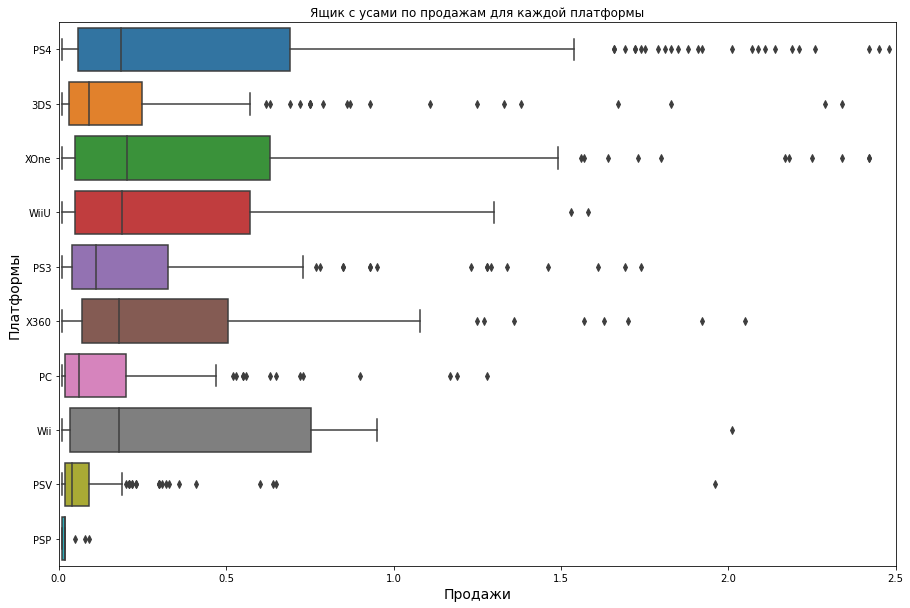

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_actual, x='total_sales', y='platform')
plt.title(label='Ящик с усами по продажам для каждой платформы')
plt.xlabel("Продажи", fontsize=14)
plt.ylabel("Платформы", fontsize=14)
plt.xlim(0, 2.5)

data_actual.groupby('platform')['total_sales'].describe().T

Для популярных платформ граница графика на отметке около 1.4 - 1.6 млн копий. Однако можо заметить, что есть игры, которые продаются по 14+ млн копий. Скорее всего, это хиты, которые пользователи ждут по несколько лет и охотно покупают.

Посмотрим как влияют оценки критиков и пользователей на продажи для одной популярной платформы, на примере платформы PS4.
Но для начала нужно избавиться от выбросов по продажам, поскольку выбросы влияют на коэффициент корреляции Пирсона,.

Создадим копию нашего акутального датафрейма без выбросов и применим функцию для очистки данных.

In [28]:
data_actual_clean = data_actual
def clean_data(data, column):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (data[column] >= (q1 - 1.5 * iqr)) & (data[column] <= (q3 + 1.5 * iqr))
    return data.loc[iqr_test]

data_actual_clean = clean_data(data_actual_clean, 'total_sales')

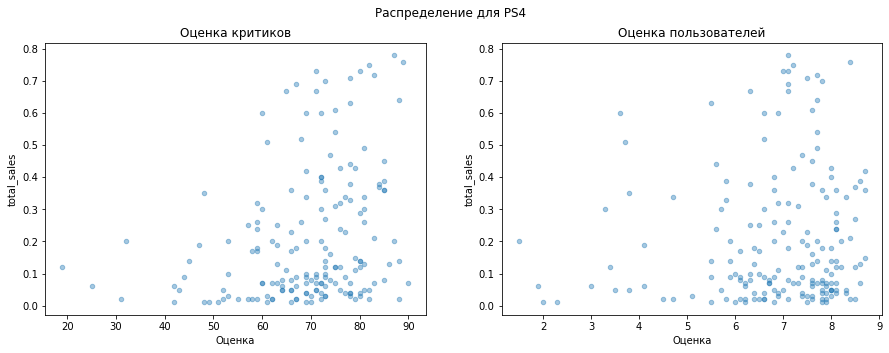

,total_sales,critic_score,user_score
total_sales,1.000000,0.143028,0.084093
critic_score,0.143028,1.000000,0.902063
user_score,0.084093,0.902063,1.000000


In [29]:
fig, axs = plt.subplots(1,2)
fig.suptitle("Распределение для PS4")
fig.set_figheight(5)
fig.set_figwidth(15)
(
    data_actual_clean[(data_actual_clean['platform'] == 'PS4') & (data_actual_clean['critic_score'] > 0)]
    .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, ax=axs[0])
)
(
    data_actual_clean[(data_actual_clean['platform'] == 'PS4') & (data_actual_clean['user_score'] > 0)]
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, ax=axs[1])
)
axs[0].set_title('Оценка критиков') 
axs[0].set_xlabel('Оценка')
axs[1].set_title('Оценка пользователей') 
axs[1].set_xlabel('Оценка')
plt.show()
display(
    data_actual_clean[data_actual_clean['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']]
        .corr()
        .style.background_gradient(cmap='coolwarm')
       )   

Итоговые продажи PS4 больше зависят от оценок критиков, чем от оценок пользователей, но зависимость слабая. 

Посмотрим диаграммы рессеивания для остальных популярных платформ.

In [30]:
data_actual_clean['platform'].unique()

array(['PS4', '3DS', 'XOne', 'X360', 'PS3', 'WiiU', 'PC', 'PSV', 'Wii',
       'PSP'], dtype=object)

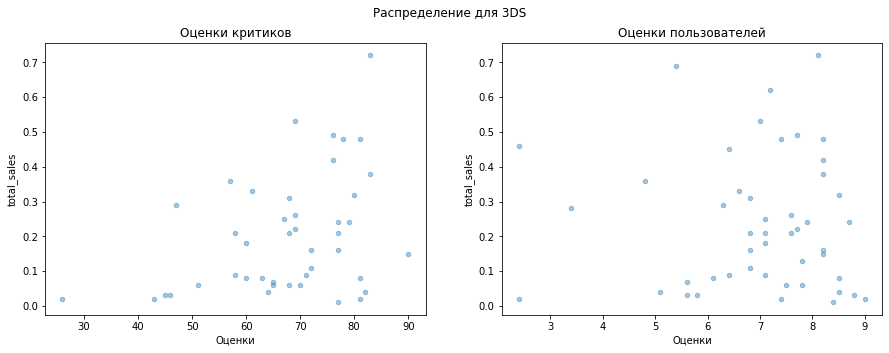

,total_sales,critic_score,user_score
total_sales,1.000000,0.201976,0.280828
critic_score,0.201976,1.000000,0.866047
user_score,0.280828,0.866047,1.000000


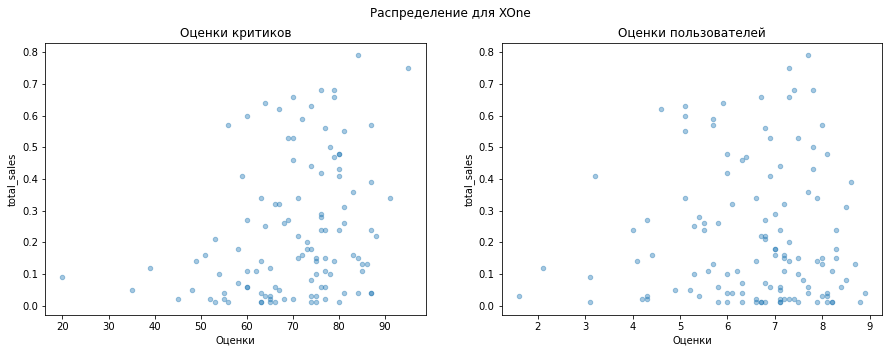

,total_sales,critic_score,user_score
total_sales,1.000000,0.234745,0.077125
critic_score,0.234745,1.000000,0.783893
user_score,0.077125,0.783893,1.000000


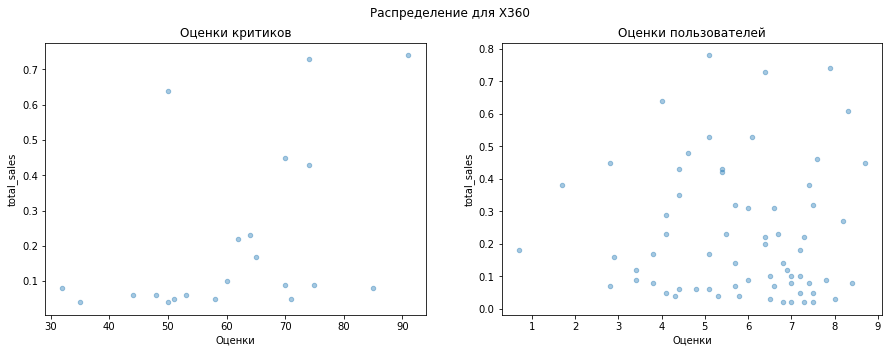

,total_sales,critic_score,user_score
total_sales,1.000000,0.113519,0.211697
critic_score,0.113519,1.000000,0.331295
user_score,0.211697,0.331295,1.000000


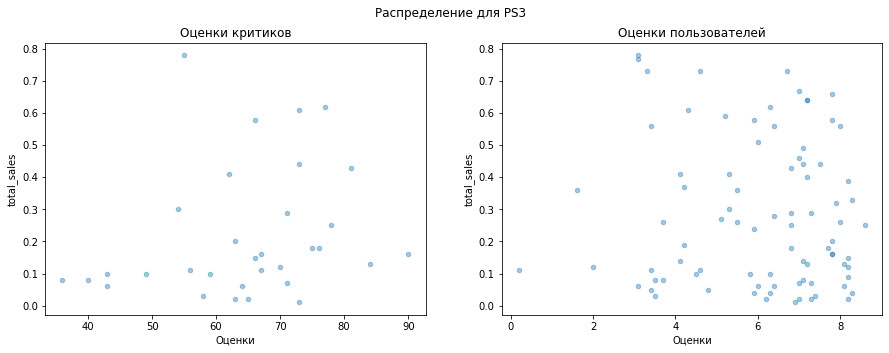

,total_sales,critic_score,user_score
total_sales,1.000000,0.123924,0.444836
critic_score,0.123924,1.000000,0.509596
user_score,0.444836,0.509596,1.000000


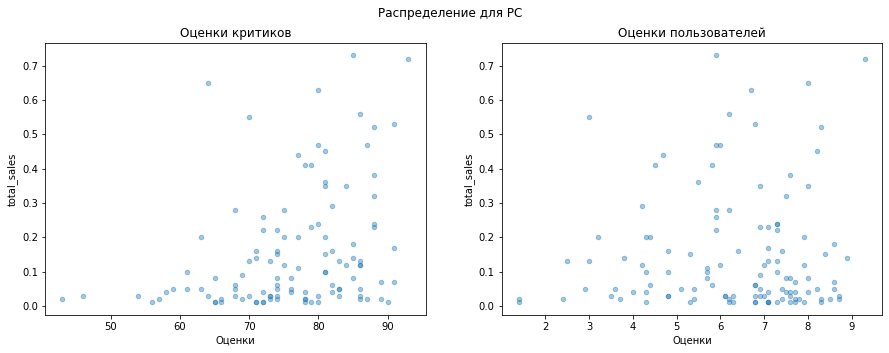

,total_sales,critic_score,user_score
total_sales,1.000000,0.317729,0.198883
critic_score,0.317729,1.000000,0.783475
user_score,0.198883,0.783475,1.000000


In [31]:
for i in ['3DS', 'XOne', 'X360', 'PS3','PC']:
    fig, axs = plt.subplots(1,2)
    fig.suptitle("Распределение для"+' '+i)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    (
        data_actual_clean[(data_actual_clean['platform'] == i) & (data_actual_clean['critic_score'] > 0)]
        .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, ax=axs[0])
    )
    (
        data_actual_clean[(data_actual_clean['platform'] == i) & (data_actual_clean['user_score'] > 0)]
        .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, ax=axs[1])
    )
    axs[0].set_title('Оценки критиков') 
    axs[0].set_xlabel('Оценки')
    axs[1].set_title('Оценки пользователей') 
    axs[1].set_xlabel('Оценки')
    plt.show()
    display(data_actual_clean[data_actual_clean['platform'] == i]
            [['total_sales', 'critic_score', 'user_score']]
            .corr().style.background_gradient(cmap='coolwarm'))
    

Исходя из графиков и коэффициентов корреляции можно сделать вывод, что оценки критиков и пользователей в равной степени влияют на продажи, чем выше оценка, тем больше продаж. Общие продажи начинают расти при оценке критиков 60 и более, а пользователей - 5 и более.

Посмотрим на распределение игр по жанрам.

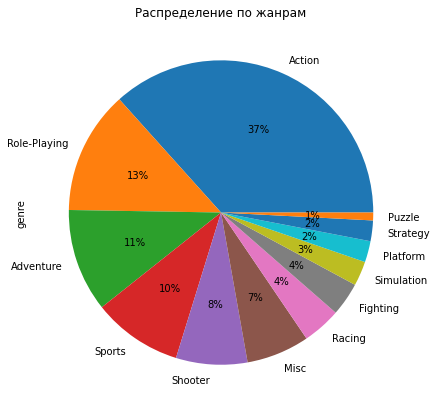

In [32]:
data_actual['genre'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.0f%%')
plt.title('Распределение по жанрам');

Больше всего игр в жанре Экшн, далее идут ролевые игры, приключенчиские и спортивыне.

Теперь посмотрим на самые прибыльные жанры.

In [33]:
top_genre = (data_actual
             .groupby('genre', as_index=False)['total_sales']
             .agg(['count', 'sum', 'mean', 'median'])
             .rename(columns={'sum': 'total_sales', 'mean': 'mean_sales', 'median': 'median_sales'})
             .sort_values( 'median_sales', ascending=False)
            )
top_genre

,count,total_sales,mean_sales,median_sales
genre,,,,
Shooter,128,170.94,1.335469,0.515
Sports,161,109.48,0.680000,0.180
Platform,38,18.09,0.476053,0.140
Fighting,60,28.22,0.470333,0.125
Role-Playing,221,101.44,0.459005,0.110
Simulation,44,13.13,0.298409,0.100
Action,619,199.36,0.322068,0.090
Misc,113,37.55,0.332301,0.090
Racing,69,27.52,0.398841,0.090


Наиболее прибыльный жанр - экшн. Также в топ входят шутеры, спортивные и ролевые игры. Наименьшей популярностью пользуются пазлы и стратегии.

Посмотрим на данные в разрезе платформ. Для каждой ли платформы сохранится такое распределение? Создадим датафрейм для наиболее продаваемого жанра для каждой платформы.

In [34]:
top_genre_by_platforms = pd.DataFrame()

for i in ['PS4', '3DS', 'PS3', 'XOne', 'X360', 'PC']:
    t1 = (data_actual[data_actual['platform'] == i]
         .groupby(['platform', 'genre'], as_index=False)['total_sales']
         .sum()
         .sort_values('total_sales', ascending=False)
         .head(1)
        )
    top_genre_by_platforms = pd.concat((top_genre_by_platforms, t1))
    
top_genre_by_platforms.reset_index(drop=True)

,platform,genre,total_sales
0,PS4,Action,91.62
1,3DS,Role-Playing,40.02
2,PS3,Action,18.10
3,XOne,Shooter,55.39
4,X360,Shooter,13.66
5,PC,Simulation,6.59


Как мы видим, для разных платформ отличаются самые продаваемые жанры. Для игровых приставок Sony и Xbox, наиболее популярны экшны и шутеры. Для компьютеров и нинтендо - ролевые игры.

Можно посмотреть на самые непродаваемые жанры по платформам. Воспользуемся тем же алгоритмом, только выведем топ-1 снизу

In [35]:
bottom_genre_by_platforms = pd.DataFrame()

for i in ['PS4', '3DS', 'Wii', 'PS3', 'XOne', 'X360', 'PC']:
    t1 = (data_actual[data_actual['platform'] == i]
         .groupby(['platform', 'genre'], as_index=False)['total_sales']
         .mean()
         .sort_values('total_sales', ascending=False)
         .tail(1)
        )
    bottom_genre_by_platforms = pd.concat((bottom_genre_by_platforms, t1))

bottom_genre_by_platforms.reset_index(drop=True)

,platform,genre,total_sales
0,PS4,Puzzle,0.020000
1,3DS,Adventure,0.074762
2,Wii,Adventure,0.180000
3,PS3,Puzzle,0.040000
4,XOne,Simulation,0.110000
5,X360,Platform,0.095000
6,PC,Misc,0.016667


Вывод:

Среди пяти наиболее популярных жанров игр находятся экшн, ролевые, приключения, спорт и шутеры. Однако, если рассматривать медианные продажи, то самыми успешными оказываются шутеры, спортивные игры, платформеры, драки и ролевые игры. Несмотря на то, что экшн занимает седьмое место по медианному значению, он остается самым распространенным жанром. Жанры, которые показывают себя менее прибыльными, включают пазлы, стратегии и приключения. Интересно отметить, что приключенческие игры, несмотря на их популярность, оказываются неприбыльным жанром, в то время как платформеры, хоть и не так распространены, показывают хорошие медианные продажи. Таким образом, можно сделать вывод, что самыми прибыльными жанрами являются шутеры и спорт, а экшн остается наиболее популярным жанром. Пазлы и стратегии являются наименее популярными жанрами в терминах продаж, вероятно, потому что большая часть игр этих жанров перешла на мобильные устройства.

## <a name="4"> 4. Составим портрет пользователя каждого региона.</a>

Определим самые популярные платформы и жанры для разных регионов и посмотрим как влияет рейтинг ESRB на продажи в отдельно взятом регионе.

Сначала посмотрим на самые популряные платформы в разных регионах. Посмотрим на долю их продаж в регионе и во всем мире.

'Популярные платформы для NA'

,platform,na_sales,total_sales,ratio_total,ratio_region
3,PS4,98.61,288.15,0.342218,0.347145
9,XOne,81.27,140.36,0.579011,0.286102
8,X360,28.30,48.22,0.586893,0.099627
0,3DS,22.64,86.68,0.261191,0.079701
2,PS3,22.05,68.18,0.323409,0.077624


'Популярные платформы для EU'

,platform,eu_sales,total_sales,ratio_total,ratio_region
3,PS4,130.04,288.15,0.451293,0.480420
9,XOne,46.25,140.36,0.329510,0.170866
2,PS3,25.54,68.18,0.374597,0.094355
1,PC,17.97,27.05,0.664325,0.066388
0,3DS,16.12,86.68,0.185971,0.059554


'Популярные платформы для JP'

,platform,jp_sales,total_sales,ratio_total,ratio_region
0,3DS,44.24,86.68,0.510383,0.475239
3,PS4,15.02,288.15,0.052126,0.161349
5,PSV,14.54,22.40,0.649107,0.156193
2,PS3,11.22,68.18,0.164564,0.120529
7,WiiU,7.31,42.98,0.170079,0.078526


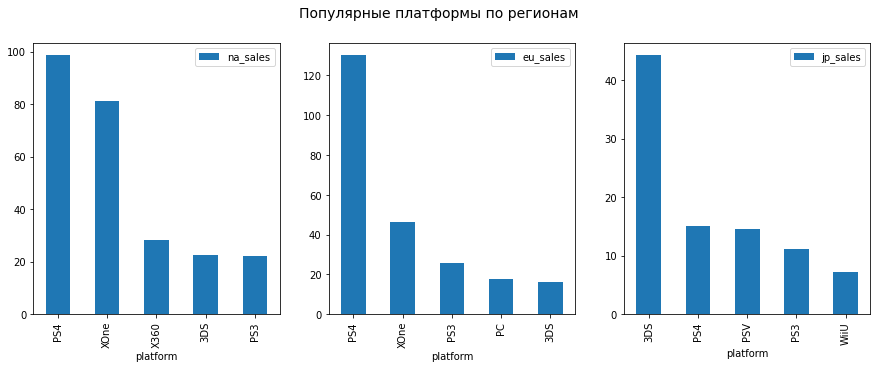

In [36]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Популярные платформы по регионам', fontsize=14)

li = ['na_sales', 'eu_sales', 'jp_sales']

for i, j in zip(li, range(len(li))):
    platform_sales = (data_actual
         .groupby('platform', as_index=False)
         .agg({i:'sum', 'total_sales':'sum'})
         .assign(ratio_total = (lambda x: x[i]/x['total_sales']), ratio_region = (lambda x: x[i]/x[i].sum()))
         .sort_values(i, ascending=False)
         .head(5)
        )
    display(f'Популярные платформы для {i.upper():.2}', platform_sales)     
    platform_sales.plot.bar(x='platform', y=i, ax = axs[j])

Вывод по платформам:

В Северной Америке лидирует PS4 с почти 100 млн проданных копий. На втором по популярносте месте XOne, и что характерно - 58% продаж для данной консоли в мире приходится именно на Америку.

В Европе также лидирует PS4, но уже с 130 млн проданных копий, что составляет 45% процентов от мирового рынка. На втором месте XOne с 46 млн проданных копий. Также можно заметить, что PC игры проданные в Европе, составляют больше половины от всех игр для PC в мире.

У Японцев лидирует 3DS - 44 млн копий и почти 50% от всего рынка. Но что более интересно, PSV, которая расположилась на третьем месте, занимает более 65!% от всего рынка. Можно смело сказать, что рынок Японии - рынок портативных игровых консолей, которые можно брать с собой.

Теперь посмотрим на ситуацию с продажамми по жанрам в каждом регионе.

'Популярные жанры для NA'

,genre,na_sales,total_sales,ratio_total,ratio_region
8,Shooter,79.02,170.94,0.462267,0.278181
0,Action,72.53,199.36,0.363814,0.255333
10,Sports,46.13,109.48,0.421355,0.162395
7,Role-Playing,33.47,101.44,0.329949,0.117827
3,Misc,15.05,37.55,0.400799,0.052982


'Популярные жанры для EU'

,genre,eu_sales,total_sales,ratio_total,ratio_region
0,Action,74.68,199.36,0.374599,0.275898
8,Shooter,65.52,170.94,0.383292,0.242057
10,Sports,45.73,109.48,0.417702,0.168945
7,Role-Playing,28.17,101.44,0.277701,0.104071
6,Racing,14.13,27.52,0.513445,0.052202


'Популярные жанры для JP'

,genre,jp_sales,total_sales,ratio_total,ratio_region
7,Role-Playing,31.16,101.44,0.307177,0.334730
0,Action,29.58,199.36,0.148375,0.317757
2,Fighting,6.37,28.22,0.225726,0.068428
3,Misc,5.61,37.55,0.149401,0.060264
8,Shooter,4.87,170.94,0.028490,0.052315


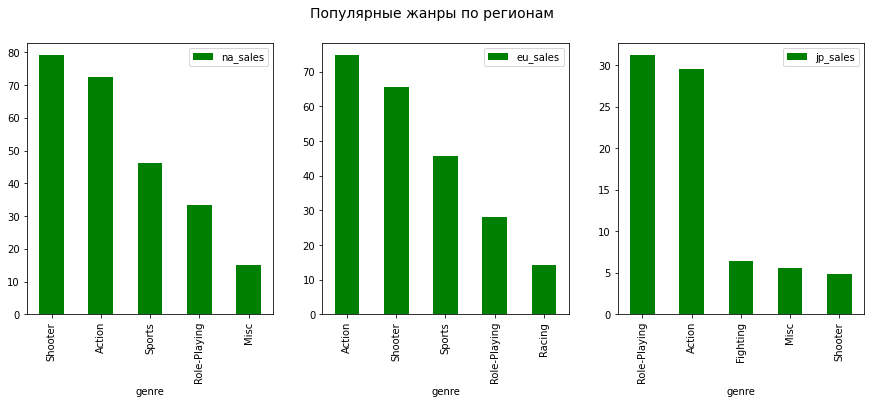

In [37]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Популярные жанры по регионам", fontsize=14)

li = ['na_sales', 'eu_sales', 'jp_sales']

for i, j in zip(li, range(len(li))):
    genre_sales = (data_actual
         .groupby('genre', as_index=False)
         .agg({i:'sum', 'total_sales':'sum'})

         .assign(ratio_total = (lambda x: x[i]/x['total_sales']), ratio_region = (lambda x: x[i]/x[i].sum()))
         .sort_values(i, ascending=False)
         .head(5)
        )
    display(f'Популярные жанры для {i.upper():.2}', genre_sales)     
    genre_sales.plot.bar(x='genre', y=i, color='g', ax = axs[j])

Можно заметить, что в целом рынки Америки и Европы очень схожи. У обоих лидируют экшены и шутеры. Спортивные игры тоже в топе. А вот в Азии более развиты продажи ролевых игр, а шутеры занимают лишь последнее место в топ-5

Теперь исследуем влияния рейтинга ESRB на продажи в отдельном регионе.
Для начала расшифруем рейтинг:

«E» («Everyone») — «Для всех»

«M» («Mature») — «Для взрослых»

«T» («Teen») — «Подросткам»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«K-A» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«АО» («Adults Only 18+») — «Только для взрослых»

«EC» («Early childhood») — «Для детей младшего возраста»

«RP» («Rating Pending») — «Рейтинг ожидается»

'Ргейтинг ESRB для NA'

,rating,na_sales,total_sales,ratio_total,ratio_region
2,M,96.42,226.54,0.425620,0.339435
4,Unknown,64.72,198.97,0.325275,0.227839
0,E,50.74,133.13,0.381131,0.178624
3,T,38.95,99.13,0.392918,0.137119
1,E10+,33.23,71.68,0.463588,0.116982


'Ргейтинг ESRB для EU'

,rating,eu_sales,total_sales,ratio_total,ratio_region
2,M,93.44,226.54,0.412466,0.345205
4,Unknown,58.95,198.97,0.296276,0.217785
0,E,58.06,133.13,0.436115,0.214497
3,T,34.07,99.13,0.343690,0.125868
1,E10+,26.16,71.68,0.364955,0.096645


'Ргейтинг ESRB для JP'

,rating,jp_sales,total_sales,ratio_total,ratio_region
4,Unknown,56.90,198.97,0.285973,0.611236
3,T,14.78,99.13,0.149097,0.158771
0,E,8.94,133.13,0.067152,0.096036
2,M,8.01,226.54,0.035358,0.086046
1,E10+,4.46,71.68,0.062221,0.047911


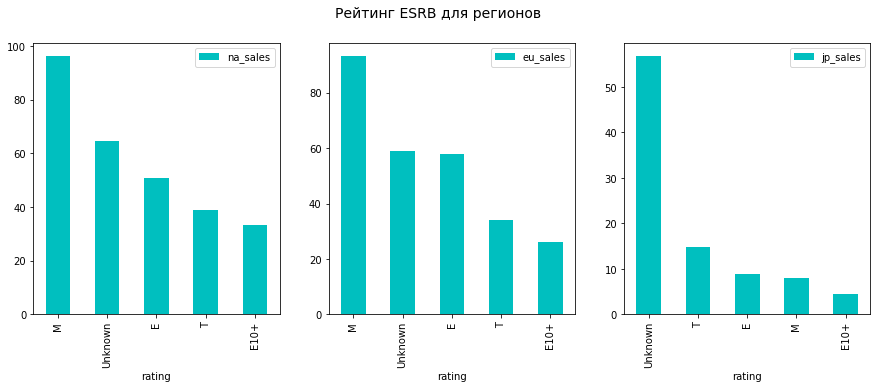

In [38]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Рейтинг ESRB для регионов", fontsize=14)

li = ['na_sales', 'eu_sales', 'jp_sales']

for i, j in zip(li, range(len(li))):
    rating_sales = (data_actual
         .groupby('rating', as_index=False)
         .agg({i:'sum', 'total_sales':'sum'})

         .assign(ratio_total = (lambda x: x[i]/x['total_sales']), ratio_region = (lambda x: x[i]/x[i].sum()))
         .sort_values(i, ascending=False)
        )
    display(f'Ргейтинг ESRB для {i.upper():.2}', rating_sales)     
    rating_sales.plot.bar(x='rating', y=i, color='c', ax = axs[j])

Вывод по рейтингу следующий: 
В Америке и Европе распредление практически одинаково. Игры для взрослых, игры с неизвестным рейтингом - почти треть продаж, игры для всех, затем игры для подростков и игры для детей старше 10 лет. А в Японии игры для взрослых занимают лишь четвертую строчку и всего лишь 3% от мирового рынка. Зато лидирует здесь именно продажи игр с неизвестным рейтингом.

Вывод:

Можно составить портрет среднестатистического пользователя по регионам:

Для Североамериканце характерны игры на консолях PS4 в жанре Шутер и рейтинг "для взрослых"

Для Европейца характерны игры на консолях PS4 в жанре Экшн и рейтинг "для взрослых"

Для Азии характерны игры для портативных консолей в жанре ролевых игр и с неизвестным рейтингом. Жанр спорт в азии практически не пользуются популярностью.

## <a name="5"> 5. Проверка гипотез</a>

Необходимо проверить следующие гипотезы:

1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

1.Сформулируем нулевую и альтернативные гипотезы:

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Создадим два датасета применив фильтр к ранее очищенным данным и проверим являются ли наши выборки однородными (с равными дисперсиями).

In [39]:
xbox = data_actual_clean[(data_actual_clean['platform'] == 'XOne') & (data_actual_clean['user_score'] > 0)]['user_score']
pc = data_actual_clean[(data_actual_clean['platform'] == 'PC') & (data_actual_clean['user_score'] > 0)]['user_score']
if np.var(xbox)==np.var(pc):
    print('True')
else:
    print('False')

False


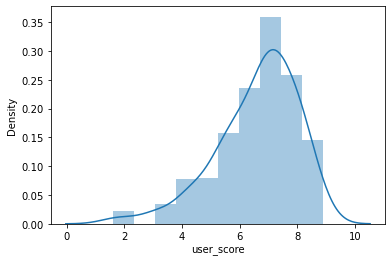

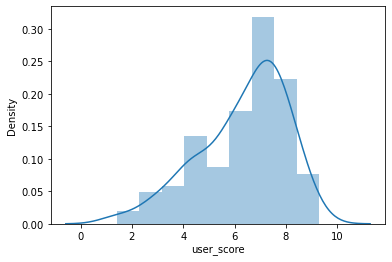

In [40]:
sns.distplot(xbox)
plt.show()
sns.distplot(pc)
plt.show()

Чаще всего для проверки равенства средних значений в двух выборках используется критерий Стьюдента. Именно такая задача стоит перед нами, поэтому мы применяем данный критерий. Применим параметр equal_var= False, предполагая, что выборки у нас разного размера и дисперсии у генеральных совокупностей разные. Уровень статистической значимости установим - 5%.

In [41]:
alpha = 0.05
results = scipy.stats.ttest_ind(xbox, pc, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1604769404962498
Не получилось отвергнуть нулевую гипотезу


Значение p-value более 5%. Можно сказать, что с вероятностью в 16% отвергнуть нулевую гипотезу будет ошибкой.

2.Сформулируем нулевую и альтернативные гипотезы:

H0 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы.

H1 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [42]:
action = data_actual_clean[(data_actual_clean['genre'] == 'Action') & (data_actual_clean['user_score'] > 0)]['user_score']
sports = data_actual_clean[(data_actual_clean['genre'] == 'Sports') & (data_actual_clean['user_score'] > 0)]['user_score']
if np.var(action)==np.var(sports):
    print('True')
else:
    print('False')

False


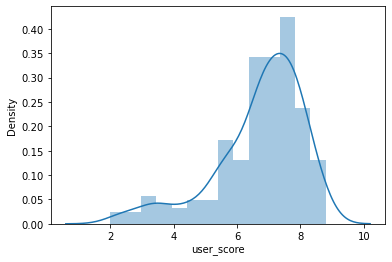

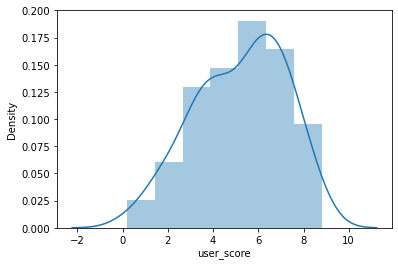

In [43]:
sns.distplot(action)
plt.show()
sns.distplot(sports)
plt.show()

In [44]:
alpha = 0.05
results=scipy.stats.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.895287968702648e-10
Отвергаем нулевую гипотезу


Уровень p-значимости невероятно мал. Это значит, что вероятность получить такой результат или более далекий от предполагаемого ничтожно мала. Здесь мы отвергаем нулевую гипотезу.

## <a name="6"> 6. Вывод.</a>

В ходе исследования был выполнен обширный объем работы:

1. Познакомились с данными.
2. Выполнили предобработку данных, включающую:
   - Приведение в порядок названий колонок.
   - Преобразование типов данных.
   - Проверку наличия дубликатов и аномалий.
   - Заполнение пропущенных значений.
3. Выполнили рассчеты, в том числе:
   - Подсчет суммарных продаж для каждой игры.
4. Провели исследовательский анализ данных:
   - Изучили зависимость продаж от регионов, жанров, платформ и оценок.
   - Проанализировали количество выпускаемых игр по годам.
   - Определили "срок жизни" платформ и выбрали актуальный период для анализа данных.
   - Изучили данные на наличие выбросов и обработали их.
   - Составили потенциальные портреты пользователей в разных регионах.
5. Проверили гипотезы:
   - Сравнили средние оценки пользователей для двух платформ и двух жанров игр.

Несколько выводов, которые можно сделать на основе проведенной работы:

1. Количество игр, выпускаемых для всех платформ, резко уменьшается начиная с 2010 года, что объясняется развитием рынка мобильных устройств.
2. Средний срок жизни популярных платформ составляет около 10 лет, а пик их популярности приходится на 5-й год.
3. Продажи игр прямо пропорционально зависят от оценок, независимо от того, кто их выставил - пользователи или критики. Также высокие оценки критиков ведут к более высоким продажам.
4. Самыми популярными жанрами являются экшн, шутеры, спортивные и ролевые игры.
5. Предпочтения по платформам отличаются в разных регионах: в Америке и Европе популярны Xbox и PlayStation, в то время как в Азии более популярны портативные консоли, такие как Nintendo и PSP.
6. В разных регионах также наблюдаются различия в предпочитаемых жанрах игр. В Америке и Европе популярны экшн и шутеры, а в Азии - ролевые игры. Шутеры и спортивные игры в Азии не пользуются большой популярностью.
7. Игры с рейтингом "для взрослых" не являются перспективными в Азии, составляя всего 3% от мирового рынка.
8. Средние оценки пользователей для PC и Xbox One не отличаются, но средние оценки пользователей в жанрах экшн и спорт различаются.

Таким образом, закономерности, определяющие успешность игры:

- В регионах Америки и Европы на платформе PS4 в жанрах Экшн, Спорт и Шутеры
- В регионе Азии на платформе 3DS на игре в жанре Ролевые игры